In [2]:
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [3]:
dict_dia_semana = {}
semana = 'raw_semana_2020_11_02'
rango_fechas = [x for x in range(2, 9)]
dict_dia_semana [semana] = rango_fechas

semana = 'raw_semana_2020_11_09'
rango_fechas = [x for x in range(9, 16)]
dict_dia_semana [semana] = rango_fechas

semana = 'raw_semana_2020_11_16'
rango_fechas = [x for x in range(16, 21)]
dict_dia_semana [semana] = rango_fechas

conteo_datos_ele = []
conteo_datos_dsl = []

for semana in dict_dia_semana:
    for i in dict_dia_semana[semana]:
        fecha = f'2020_11_{i:02d}'
        print(f'Leyendo {fecha}')

        df_ele = pd.read_parquet(f'{semana}/raw_data_Ttec_{fecha}.parquet')
        
        conteo_datos_ele.append(df_ele['patente'].value_counts())
        df_dsl = pd.read_parquet(f'{semana}/raw_data_Ttec_dsl_{fecha}.parquet')
        conteo_datos_dsl.append(df_dsl['patente'].value_counts())


Leyendo 2020_11_02
Leyendo 2020_11_03
Leyendo 2020_11_04
Leyendo 2020_11_05
Leyendo 2020_11_06
Leyendo 2020_11_07
Leyendo 2020_11_08
Leyendo 2020_11_09
Leyendo 2020_11_10
Leyendo 2020_11_11
Leyendo 2020_11_12
Leyendo 2020_11_13
Leyendo 2020_11_14
Leyendo 2020_11_15
Leyendo 2020_11_16
Leyendo 2020_11_17
Leyendo 2020_11_18
Leyendo 2020_11_19
Leyendo 2020_11_20


In [27]:
df_ele = pd.DataFrame()
df_ele['2'] = conteo_datos_ele[0]
for i in range(1, len(conteo_datos_ele)):
    df_ele = pd.concat([df_ele, conteo_datos_ele[i]], axis=1)
    df_ele.rename(columns={'patente': f'{i+2}'}, inplace=True)


In [28]:
columnas = df_ele.columns
df_ele.reset_index(inplace=True)

In [31]:
df_ele = pd.melt(df_ele, id_vars=['index'], value_vars=columnas)

In [33]:
df_ele.rename(columns={'variable': 'dia', 'value': 'conteo'}, inplace=True)

In [34]:
df_ele['Tipo_Bus'] = 'Eléctrico'

In [35]:
df_ele

,index,dia,conteo,Tipo_Bus
0,PGPT-49,2,146.0,Eléctrico
1,PFVG-29,2,142.0,Eléctrico
2,PFYS-52,2,142.0,Eléctrico
3,PFVC-45,2,141.0,Eléctrico
4,PGPT-59,2,140.0,Eléctrico
...,...,...,...,...
4441,PFYR-68,20,NaN,Eléctrico
4442,PFVJ-27,20,NaN,Eléctrico
4443,PGPT-19,20,404.0,Eléctrico
4444,PFTW-66,20,NaN,Eléctrico


In [36]:
df_dsl = pd.DataFrame()
df_dsl['2'] = conteo_datos_dsl[0]
for i in range(1, len(conteo_datos_dsl)):
    df_dsl = pd.concat([df_dsl, conteo_datos_dsl[i]], axis=1)
    df_dsl.rename(columns={'patente': f'{i+2}'}, inplace=True)


In [37]:
columnas = df_dsl.columns
df_dsl.reset_index(inplace=True)
df_dsl = pd.melt(df_dsl, id_vars=['index'], value_vars=columnas)
df_dsl.rename(columns={'variable': 'dia', 'value': 'conteo'}, inplace=True)
df_dsl['Tipo_Bus'] = 'Diesel'

In [38]:
df_dsl

,index,dia,conteo,Tipo_Bus
0,PFYG-94,2,187.0,Diesel
1,PDYH-82,2,185.0,Diesel
2,PDZS-83,2,178.0,Diesel
3,PFBD-65,2,176.0,Diesel
4,PDZS-81,2,168.0,Diesel
...,...,...,...,...
8184,CJRC-73,20,309.0,Diesel
8185,FLXJ-57,20,120.0,Diesel
8186,CJRG-27,20,281.0,Diesel
8187,PFVK-62,20,331.0,Diesel


In [39]:
df_f = pd.concat([df_ele, df_dsl])

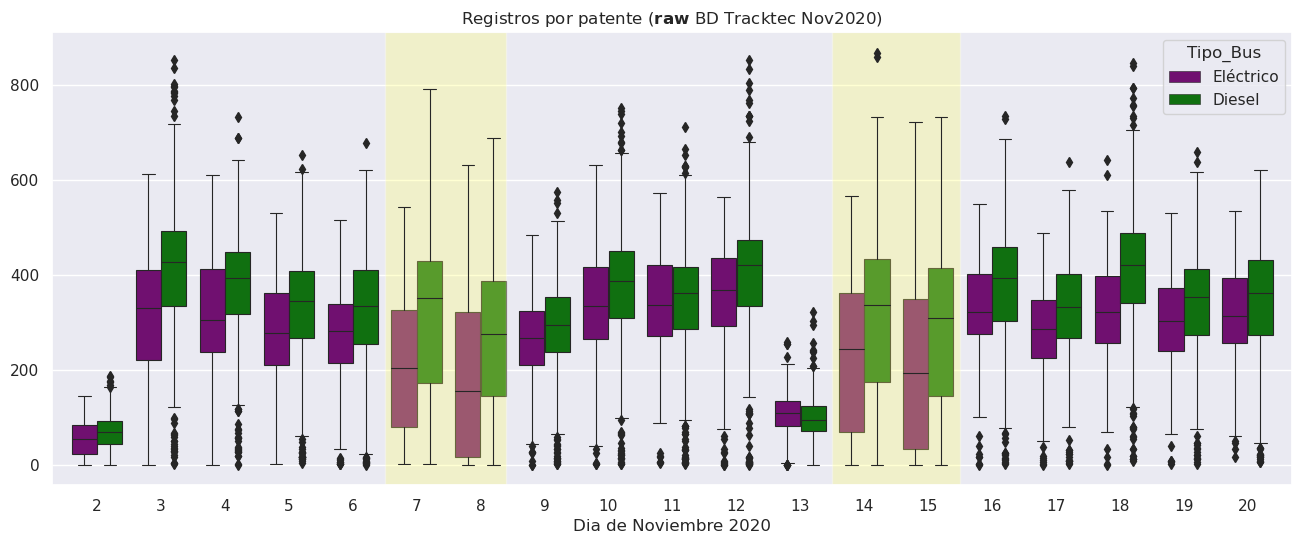

In [47]:
titulo_con_negrita = "Registros por patente (" + r"$\bf{raw}$" + " BD Tracktec Nov2020)"

palette = {'Eléctrico':'purple', 'Diesel':'green'}
f, axes = plt.subplots(1, 1, figsize=(16, 6), sharex=True)
sns.boxplot(data=df_f, x=df_f['dia'], y=df_f['conteo'], hue='Tipo_Bus', palette=palette, linewidth=0.8)
axes.set(xlabel='Dia de Noviembre 2020', ylabel='')
plt.title(titulo_con_negrita)
plt.axvspan(4.5, 6.4, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.5, facecolor='#FFFF6F', alpha=0.3)